# Gaussian Mixture Models


In [1]:
import numpy as np
N = 1000
#For plotting
import matplotlib.pyplot as plt
    
y = 1.*np.zeros(N)

# Set up data
out1 = np.random.normal(6,1,N)
out2 = np.random.normal(1,1,N)
choice = np.random.rand(N)
    
w = [choice>=0.5]
y[w] = out1[w]	
w = [choice<0.5]
y[w] = out2[w]
    
Y = y

#copy of 'y' to plot
plt.hist(Y, bins=50,color = "darkorange", ec="black")
plt.show()

<Figure size 640x480 with 1 Axes>

The output for any particular datapoint that is input to the algorithm will be the sum of the values expected by all of the $M$ Gaussians:

\begin{equation}
f(x) = \sum_{m=1}^M \alpha_m \phi(x; \mu_m, \Sigma_m)
\end{equation}

where $\phi(x; \mu_m, \Sigma_m)$ is a Gaussian function with mean $\mu_m$, and covariance matriz $\Sigma_m$, and the $\alpha_m$ are weights with constraint that $\sum_{m=1}^M \alpha_m = 1$.

The probability that input $x_i$ belongs to class $m$ can be written as (where a hat on a variable ($\hat{\cdot}$) means that we are estimating the value of that variable):

\begin{equation}
p(x_i \in c_m) = \frac{ \hat{\alpha}_m \phi(x_i; \hat{\mu_m}; \hat{\Sigma_m}) }{ \sum_{k=1}^M \hat{\alpha}_m \phi(x_i; \hat{\mu_k}; \hat{\Sigma}_k) } 
\end{equation}

## The Gaussian Mixture Model EM Algorithm
- Initialisation
     - set $\mu^1$ and $\mu^2$ to be randomly chosen values from the dataset
     - set $ \hat{\sigma}_1 = \hat{\sigma}_2 = (y _i − ȳ)^2 /N$ (where ȳ is the mean of the entire dataset)
     - set $\hat{\pi} $= 0.5

In [2]:
mu1 = y[np.random.randint(0,N-1,1)]
mu2 = y[np.random.randint(0,N-1,1)]
print mu1, mu2

mu1 = y[np.random.randint(0,N-1,1)]
mu2 = y[np.random.randint(0,N-1,1)]
s1 = np.sum((y-np.mean(y))**2)/N
s2 = s1
pi = 0.5

[4.49347853] [1.49449205]


- Repeat until convergence:


In [3]:
def gf(y, mu, s):
    return np.exp(-(y-mu)**2/(2*s))

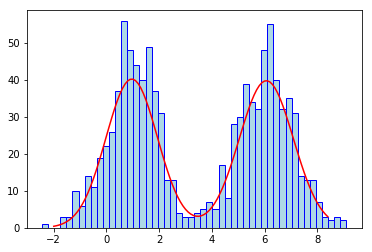

In [4]:
# EM loop
count = 0
gamma = 1.*np.zeros(N)
nits = 100

ll = 1.*np.zeros(nits)
	
while count<nits:
    count = count + 1

    	# E-step
    for i in range(N):
        gamma[i] = pi*gf(y[i], mu1, s1)/ (pi * np.exp(-(y[i]-mu1)**2/(2*s1)) + (1-pi)* np.exp(-(y[i]-mu2)**2/2*s2))
        
    	# M-step
    mu1 = np.sum((1-gamma)*y)/np.sum(1-gamma)
    mu2 = np.sum(gamma*y)/np.sum(gamma)
    s1 = np.sum((1-gamma)*(y-mu1)**2)/np.sum(1-gamma)
    s2 = np.sum(gamma*(y-mu2)**2)/np.sum(gamma)
    pi = np.sum(gamma)/N
        	
    ll[count-1] = np.sum(np.log(pi*np.exp(-(y[i]-mu1)**2/(2*s1)) + (1-pi)*np.exp(-(y[i]-mu2)**2/(2*s2))))

x = np.arange(-2,8.5,0.1)
y = 80*pi*np.exp(-(x-mu1)**2/(2*s1)) + 80*(1-pi)*np.exp(-(x-mu2)**2/(2*s2))

plt.hist(Y, bins=50,color = "lightblue", ec="blue")
plt.plot(x,y,'r')


plt.show()

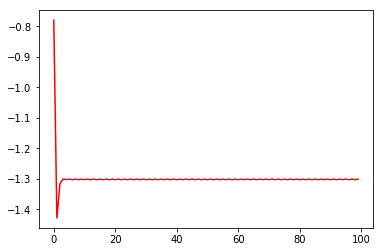

In [5]:
plt.plot(ll,'r-')
plt.show()

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture



In [16]:
p = X[:,:2]


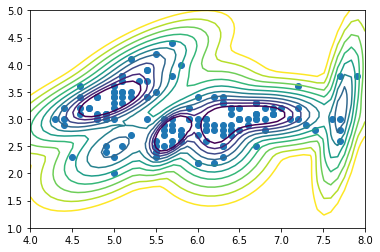

In [80]:



# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=7, covariance_type='full')
clf.fit(p)

# display predicted scores by the model as a contour plot
x = np.linspace(4, 8)
y = np.linspace(1, 5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm( vmax=10.0),
                 levels=np.logspace(0, 1, 10))

plt.scatter(p[:, 0], p[:, 1])


plt.show()